Download the titanic dataset from https://www.kaggle.com/c/titanic/data, Perform a basic analysis and answer the following questions:

In [1]:
import pandas as pd
import numpy as np

1. What was the survival rate overall?

In [4]:
df = pd.read_csv('./train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df['Survived'].mean()

0.3838383838383838

In [8]:
df['Survived'].sum()

342

In [9]:
342/891

0.3838383838383838

2. Which gender fared the worst? What was their survival rate?

In [17]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


3. What was the survival rate for each `Pclass`?

In [27]:
len(df[(df['Survived'] == 1) & (df['Pclass'] ==1)])/len(df['Pclass'] ==1)

0.1526374859708193

In [28]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [29]:
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


4. Did any reverends survive? How many?

In [38]:
str(2)

'2'

In [40]:
df[df['Name'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S


In [41]:
reverend = ["Sister","Priest","Father","Deacon",
            "Abbot","Abbess","Bishop", "Cardinal",
            "Patriach","Metropolitan","Archbishop ",
            "Novice","Protopriest","Archpriest","Archimandrite",
            "Hieromonk","Wife","Protodeacon","Archdeacon",
            "Hierodeacon","Rassophore","Stavrophore","Schemamonk", "Rev."]

reverend_df = df[df.Name.str.contains("|".join(reverend))]
print("{} reverends survive out of {} in the df incident".\
       format(reverend_df.Survived.sum(),reverend_df.shape[0]))

3 reverends survive out of 10 in the df incident


6. What is the survival rate for people whose `Age` is empty?

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [52]:
df['Age'].isna().sum()`

177

In [53]:
len(df[(df['Age'].isna()) & (df['Survived'] == 1)])/df['Age'].isna().sum()

0.2937853107344633

7. What is the survival rate for each port of embarkation?

In [55]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [57]:
import matplotlib.pyplot as plt

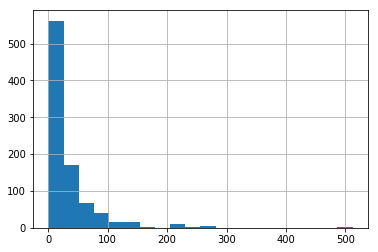

In [61]:
df['Fare'].hist(bins = 20)

In [ ]:
df[df['Fare']]

In [63]:
df['Fare'].max()

512.3292

In [62]:
df['Fare'].mean()

32.2042079685746

8. What is the survival rate for children (under 12) in each `Pclass`?

In [69]:
len(df[(df['Age'] < 12) & (df['Survived'] ==1) & 
       (df['Pclass'] == 3)])/len(df[(df['Age'] < 12) & (df['Pclass'] == 3)])

0.40425531914893614

In [76]:
df[df['Age'] < 12].groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,463.250000,0.750000,4.480000,0.750000,2.000000,126.239575
2,451.235294,1.000000,3.490000,0.823529,1.352941,28.740200
3,429.531915,0.404255,5.104681,2.361702,1.404255,24.919679


9. Did the captain of the ship survive? Is he on the list?

In [78]:
df[df['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [82]:
df[(df['Survived'] == 0) & (df['Fare'])].sort_values('Fare', ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C


11. Does having family on the boat help or hurt your chances of survival?

In [97]:
df['isFamily'] = (df.SibSp > 0) | (df.Parch > 0)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_fam,isFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,False


In [100]:
df.groupby('isFamily')[['Survived']].mean()

,Survived
isFamily,
False,0.303538
True,0.505650


In [101]:
df.groupby(['isFamily','Sex'])[['Survived']].mean()

Survived
isFamily Sex             
False    female  0.785714
         male    0.155718
True     female  0.712766
         male    0.271084

In [95]:
len(df[df['have_fam'].isna() & df['Survived'] == 1])/ len(df['have_fam'].isna())

0.1829405162738496

In [96]:
len(df[df['have_fam'].isna() & df['Survived'] == 0])/ len(df['have_fam'].isna())

0.8170594837261503